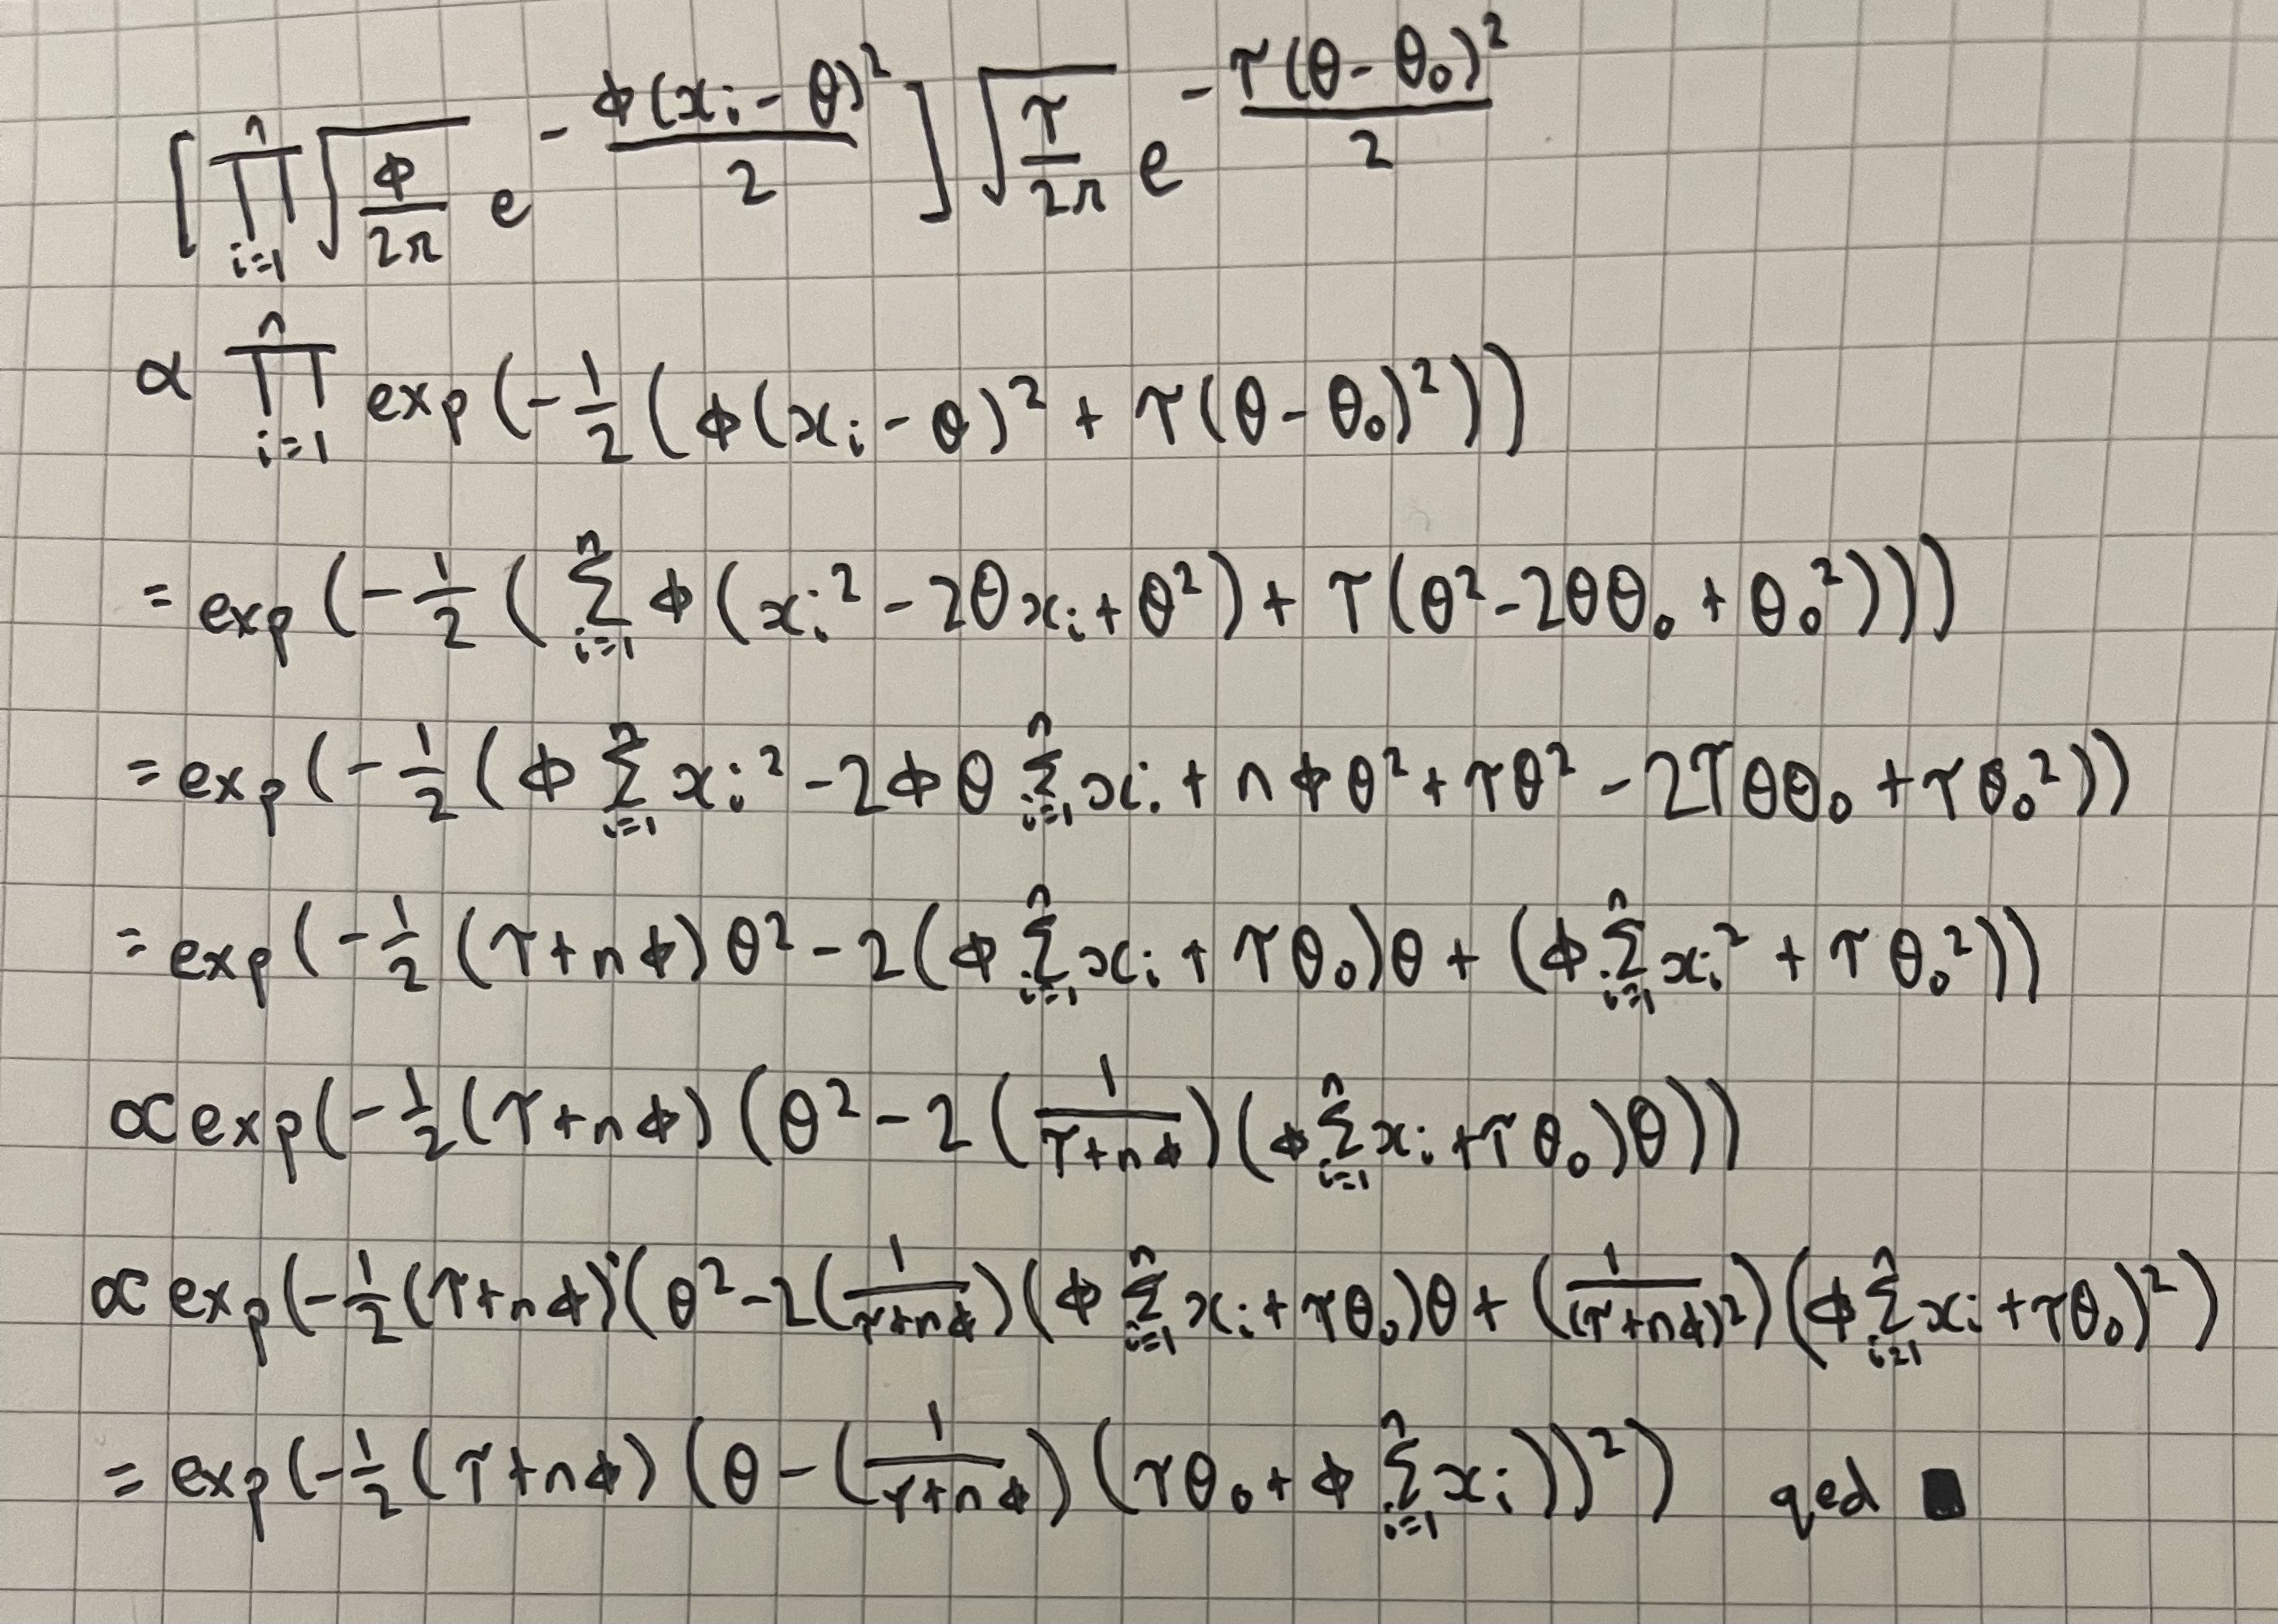

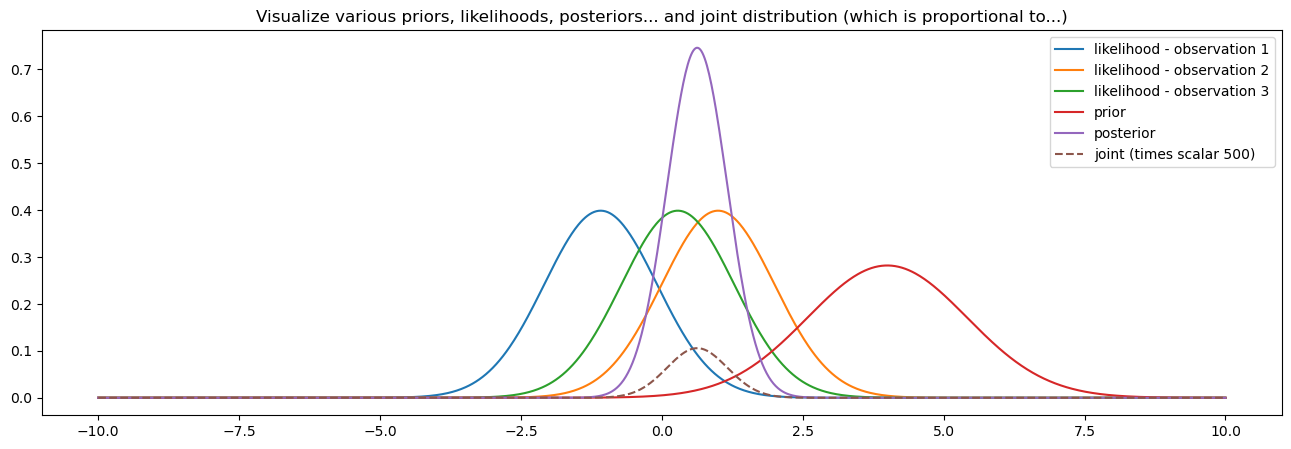

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(123)
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

likelihoods = np.zeros((n, len(parameter_domain)))

for i in range(n):
    likelihoods[i, :] = stats.norm.pdf(x[i], loc=parameter_domain, scale=1)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c, c2 = 500, 1
joint = c * likelihoods.prod(axis=0) * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16, 5))
for i in range(n):
    plt.plot(parameter_domain, c2 * likelihoods[i, :], label=f"likelihood - observation {i+1}")

plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar " + str(c) + ")")

plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.show()

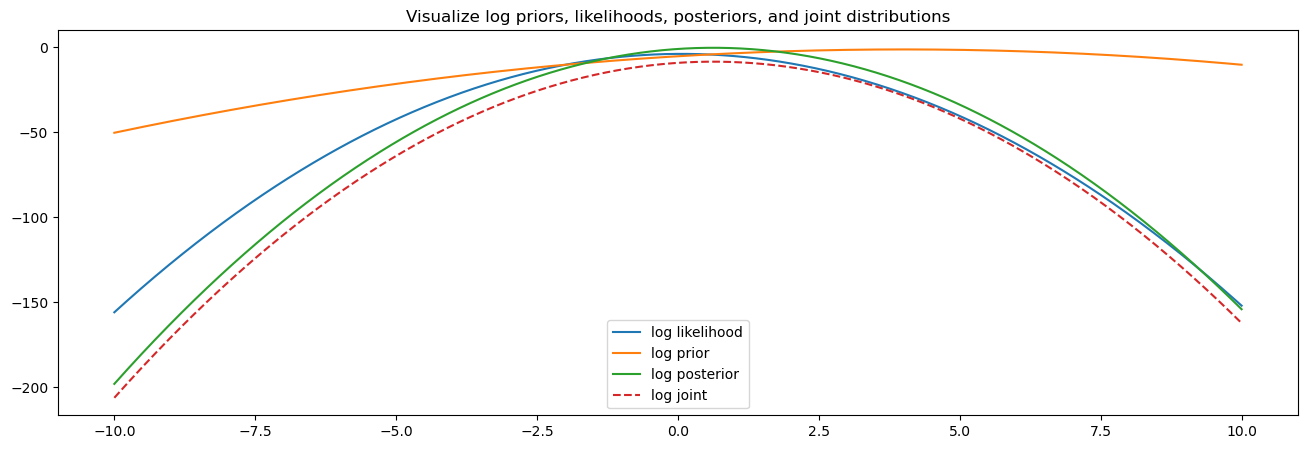

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(123)
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

log_likelihood = np.sum(stats.norm.logpdf(x[:, np.newaxis], loc=parameter_domain, scale=1), axis=0)
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
log_joint = log_likelihood + log_prior
log_posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihood, label="log likelihood")
plt.plot(parameter_domain, log_prior, label="log prior")
plt.plot(parameter_domain, log_posterior, label="log posterior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="log joint")
plt.legend()
plt.title("Visualize log priors, likelihoods, posteriors, and joint distributions")
plt.show()


3. If the prior is 1, then the posterior is directly proportional with the likelihood, which is normally distributed. As such, the posterior is also normally distributed.

4. When the improper prior is used, the log posterior is equal to the log likelihood plus the log marginal likelihood constant.